In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
boston=datasets.load_boston()

In [6]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [7]:
x=boston.data
y=boston.target
df=pd.DataFrame(x,columns=boston.feature_names)

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
x1=x[:,5]

In [27]:
y = y.reshape(-1, 1)
x1= x1.reshape(-1, 1)


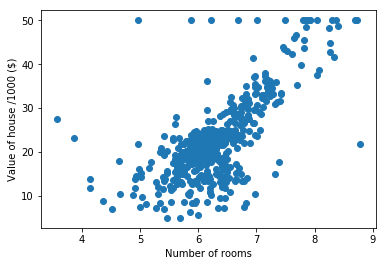

In [28]:
plt.scatter(x1,y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

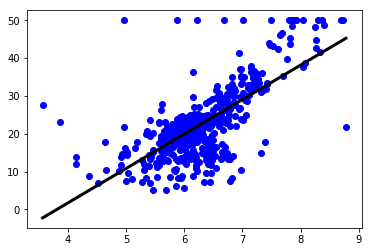

In [29]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x1, y)
prediction_space = np.linspace(min(x1),max(x1)).reshape(-1, 1)
plt.scatter(x1, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),color='black', linewidth=3)
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.7109203586326294

In [31]:
from sklearn.model_selection import cross_val_score
reg = linear_model.LinearRegression()
cv_results = cross_val_score(reg,x, y, cv=5)
print(cv_results)
np.mean(cv_results) 

[ 0.63861069  0.71334432  0.58645134  0.07842495 -0.26312455]


0.3507413509325256

In [32]:
#RIDGE Regression
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)


0.6995565027100417

In [34]:
#LASSO Regression
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.5950229292587828

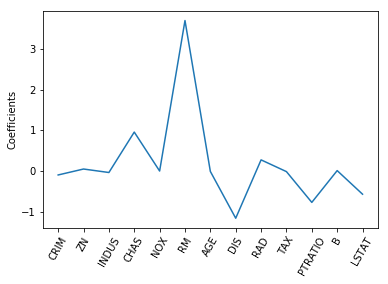

In [39]:
names = boston.feature_names
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(x, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)#xlabel
_ = plt.ylabel('Coefficients')
plt.show()

In [36]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

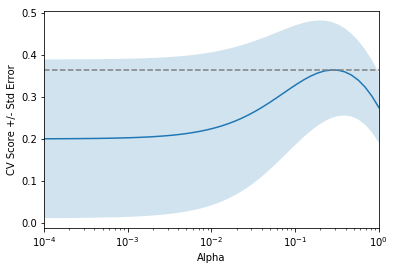

In [37]:
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, x, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


In [43]:
gp=pd.read_csv('gapminder.csv')

In [44]:
gp.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,0.03,0.5696534,26.8,75944000,25.60000038,,3.654121623,48.673,,0,,6.6843853,55.70000076,24.04
1,Albania,1914.996551,7.29,1.0247361,57.4,223747333.3,42.09999847,,44.98994696,76.918,,9,636.3413834,7.699329853,51.40000153,46.72
2,Algeria,2231.993335,0.69,2.306817,23.5,2932108667,31.70000076,0.1,12.50007331,73.131,0.420094525,2,590.5098143,4.848769665,50.5,65.22
3,Andorra,21943.3399,10.17,,,,,,81,,,,,5.362178802,,88.92
4,Angola,1381.004268,5.57,1.4613288,23.1,248358000,69.40000153,2,9.999953883,51.093,,-2,172.9992274,14.55467701,75.69999695,56.7
